# Deuxième projet Mathématique-Informatique : Equations différentielles II

## Pas fixe

On code d'abord le solveur utilisant la méthode d'Euler (consistante d'ordre **1**), puis un solveur utilsant la méthode de Heun (consistante d'ordre **2**). 

On va vérifier ensuite:

   1) Que ces solveurs sont fonctionnels, sur un exemple simple d'équation différentielle

   2) Que ces méthodes sont bien d'ordre respectivement 1 et 2, en traçant l'évolution de l'erreur absolue en fonction du pas de temps.

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
import matplotlib; 
import seaborn as sns
import time
sns.set()

In [53]:
def solve_euler_explicit(f ,x0, dt, t0 = 0, tf = 100):
    T = np.arange(t0, tf, dt) # Liste des tj
    X = [x0] # Liste des xj
    for i in range (len(T)-1):
        X += [X[i]+dt*f(X[i])] #calcul de x(j+1) par la méthode d'Euler et ajout à la liste des xj
    return T, X

In [54]:
def solve_heun(f, x0, dt, t0 = 0, tf = 100): # de même que précédemment, à ceci près qu'on calcule x(j+1) avec la méthode de Heun
    T = np.arange(t0, tf, dt) 
    X = [x0]
    for i in range (len(T)-1):
        X += [X[i] + 1/2*dt*(f(X[i]) + f(X[i] + dt*f(X[i])))] # calcul de x(j+1) par la méthode de Heun et ajout à la liste des xj
    return T, X

On va maintenant vérifier le bon fonctionnement de ces deux algorithmes en les testant sur l'équation différentielle suivante :
$$\overset{.}{x}\,=\,-3x$$

In [55]:
def f(a):
    return -3*a ##exponentielle attendue

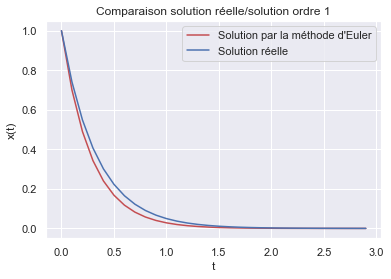

In [56]:
T, X = solve_euler_explicit(f, 1, 0.1, 0, 3)
plt.plot(T, X, 'r',label="Solution par la méthode d'Euler")
plt.plot(T, np.exp(-3*T), 'b',label="Solution réelle")
plt.legend()
plt.title("Comparaison solution réelle/solution ordre 1")
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

#On a en rouge la solution approchée obtenue par la méthode d'Euler, en bleu la solution attendue mathématiquement

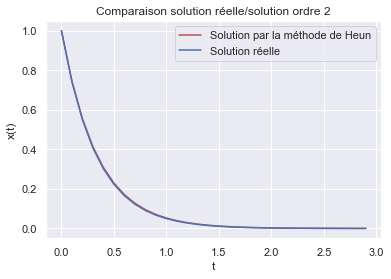

In [57]:
T, X = solve_heun(f, 1, 0.1, 0, 3)
plt.plot(T, X, 'r',label="Solution par la méthode de Heun")
plt.plot(T, np.exp(-3*T), 'b', label="Solution réelle")
plt.legend()
plt.title("Comparaison solution réelle/solution ordre 2")
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

#On a en rouge la solution approchée obtenue par la méthode de Heun, en bleu la solution attendue mathématiquement

On va maintenant vérifier que ces méthodes sont bien d'ordres respectivement 1 et 2, i.e. que l'erreur absolue entre solution théorique et approchée est majorée asymptotiquement par respectivement $\Delta t\,et\,{\Delta t}^2$

On code d'abord la fonction **cherchemax** :

In [58]:
def cherchemax(A,B): #Pour trouver le max de l'erreur entre deux listes de valeur
    res = 0
    for i in zip(A,B):
        res = max(abs(i[0]-i[1]),res)
    return res

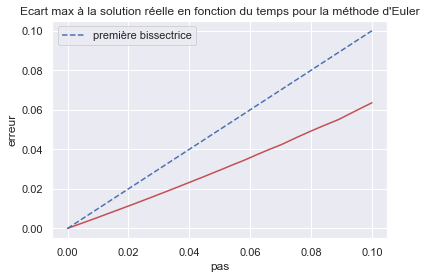

In [59]:
#EULER : on trace la première bissectrice et l'erreur absolue obtenue avec la méthode d'Euler en fonction du pas
res = [] # liste des valeur des erreur absolues
DT = np.arange(0.00001, 0.1, 0.0001)
for i in range(len(DT)):
    T, A = solve_euler_explicit(f,1,DT[i],0,3)
    B = np.exp(-3*T)
    res += [cherchemax(A,B)]
plt.plot(DT,res,'r')
plt.plot(DT, DT, 'b--',label="première bissectrice")
plt.legend()
plt.xlabel('pas')
plt.ylabel('erreur')
plt.title("Ecart max à la solution réelle en fonction du temps pour la méthode d'Euler")
plt.show()
#La courbe rouge est bien sous la courbe bleue :  on a majoré l'erreur absolue

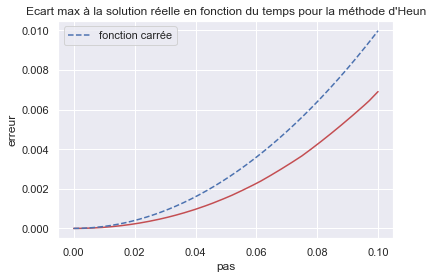

In [60]:
#HEUN : on trace la fonction carrée et l'erreur absolue obtenue avec la méthode de Heun en fonction du pas
res = [] # liste des valeur des erreur absolues
DT = np.arange(0.00001, 0.1, 0.0001)
for i in range(len(DT)):
    T, A = solve_heun(f,1,DT[i],0,3)
    B = np.exp(-3*T)
    res += [cherchemax(A,B)]
    
plt.plot(DT,res,'r')
plt.plot(DT, np.square(DT), 'b--',label='fonction carrée')
plt.legend()
plt.xlabel('pas')
plt.ylabel('erreur')
plt.title("Ecart max à la solution réelle en fonction du temps pour la méthode d'Heun")
plt.show()
#La courbe rouge est bien sous la courbe bleue :  on a majoré l'erreur absolue

---

## Adaptation du pas de temps

Montrons que sous l'hypothèse de $f$ fonction $C^1$ et dans le schéma d'Euler :

$\left\|(e^{j+1})\right\|\,=\,\Delta t_j\frac{\left\|(f(t_{j+1},x^{j+1})\,-\,f(t_{j},x^{j})\right\|}{2}\,+\,O(\Delta {t_j}^2)$

---



Par définition, $e^{j+1}\ =(\ \ x^{j}\ +\ \int_{t_j}^{t_{j+1}} f(s,x(s))ds)\ )\ -\ x^{j+1}$

Or, $e^{j+1}$ représente l'erreur entre la valeur de $x^{j+1}$ et $x(t_{j+1})$: le terme de droite dans l'équation précédente (entre parenthèses) est donc assimilable à $x(t_{j+1})$, i.e. $x(t_{j}+\Delta t_j)$

On peut effectuer un développement limité de x autour de $t_j$ car f est $C^1$ et dans le cadre du schema d'Euler: $x^{j+1}\ =\ x^j\ +\ \Delta t_j\ f(t_j,x^j)$. On effectue un DL à l'ordre 2 puisque les termes d'ordre 1 de ce DL vont se simplifier en remplaçant $x_{j+1}$

L'équation précédente devient donc, après développement limité de x à l'ordre 2 autour de $t_j$

$\left\|(e^{j+1})\right\|\,=\,\frac{\overset{..}{x}}{2}\Delta t_j^2\ +\ O({\Delta t_j}^2)$

or $\overset{..}{x}\ =\ \partial_tf(t_j, x(t_j))\ = \partial_xf(t_j, x(t_j)\times\partial_tx(t_j)\ +\partial_tf(t_j, x(t_j)\times\partial_tt_j$

d'où $\overset{..}{x}\ =\ f(t_j, x(t_j))\times\partial_xf(t_j, x(t_j))\ +\ \partial_tf(t_j, x(t_j))$

De plus, $f(t_{j+1}, x^{j+1})\ =\ f(t_j+\Delta t_j ,\ x(t_j) + \Delta t_j f(t_j, x_j))$

On va effectuer un développement de Taylor à deux variables autour de $t_j$ et $x(t_j)$

D'où $f(t_{j+1}, x^{j+1})\ =\ f(t_j,x(t_j))\ +\ \Delta t_j\times\partial_tf(t_j,x(t_j))\ +\ \Delta t \times f(x_j,t_j)\times\partial_xf(t_j,x(t_j))\ +\frac{1}{2} \Delta t_j M\ +\ O({\Delta t_j}^2)$

Où l'on a posé:

$M\ =\ \Delta t_j\times \partial^2_x f(t_j, x(t_j))\ +\ 2\Delta t_j f(x_j,t_j)\frac{\partial^2 f(x_j,t_j)}{\partial x\partial y}\ +\ f(x_j,t_{j+1})\times\partial^2_x f(t_j, x(t_j))$

On obtient donc $\Delta t_j (\partial_t(t_j,x(t_j))\ +\ f(x_j,t_j)\partial_x(t_j,x(t_j)))\ =\ f(t_{j+1},x^{j+1})-f(x_j,t^j)\ -\frac{1}{2} \Delta t_j M\ +\ O({\Delta t_j}^2)$

D'ou $\overset{..}{x}\ =\ \frac{1}{\Delta t} [f(t_{j+1}, x^{j+1})\ -\ f(t_j, x(t_j))]\ -\ \frac{1}{2}M\ -\ O(\Delta t_j)$


On en déduit $\left\|(e^{j+1})\right\|\,=\,\Delta t_j(\frac{\left\|(f(t_{j+1},x^{j+1})\,-\,f(t_{j},x^{j})\right\|}{2}\,-\ \frac{1}{2}M) + O({\Delta t_j}^2)$

M étant un grand O de ${\Delta t_j}$, on en déduit le résultat recherché

---

Maintenant, on va justifier que pour en déduire qu'une possible stratégie d'adaptation est de chosir

On a par le résultat précédent $e^{j+1}\ =\ \Delta t_j\times\eta_{j+1}$, et puisque le schéma d'Euler explicite est consistant d'ordre 1, on a $\left\|\eta_{j+1}\right\|\,\le\,c_s\times\Delta t_j^2$.

Donc $\left\|(e^{j+1})\right\|\,=\,O(\Delta t_j^2)$

Cette égalité traduit le fait que l'erreur commise varie selon le carré du pas de temps choisi. Ainsi, pour majorer l'erreur totale par $Tol_{abs}$ à l'itération, il faut adapter le pas de temps pour respecter l'égalité $(\frac{\Delta t_{new}}{\Delta t_j})^2 \approx\ \frac{Tol_{abs}}{\left\|(e^{j+1})\right\|} $

Soit $\Delta t_{new}\ =\ \Delta t_j\times\sqrt{\frac{Tol_{abs}}{\left\|(e^{j+1})\right\|}}$

---

# Commentaire d'algorithme

In [61]:
def solve_ivp_euler_explicit_variable_step(omega,f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x,omega)
            x_back = x_next - dt * f(x_next,omega)
            ratio_abs_error = atol / (np.linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * sqrt(ratio_abs_error)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x,omega)
        ts = np.vstack([ts,t_next])
        xs = np.vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs.T)

Le solveur ci dessus permet donc d'adapter le pas à l'erreur calculée. 
Il est tout d'abord important de remarquer que, si le pas varie, l'échantillonnage reste quant à lui constant: c'est le sens de la deuxième boucle while.

On commence par prendre un $\Delta t$ **dt** par défaut à la valeur $\frac{dt_{max}}{10}$ (**dtmax/10**) et par initialiser une liste temps et une liste solution contenant respectivement **t0** et **x0**. On créée de plus une variable **ti** qui va permettre de mesurer le temps écoulé entre la dernière valeur de **x** stockée, et celle que l’on est en train de calculer. Quant à **t** et **x**, ils représentent l’instant courant et la valeur de $x$ à cet instant courant. 

On entre dans la première boucle while, de laquelle on ne sortira que quand on arrivera au temps final programmé par l’utilisateur, donc quand les listes des temps **ts** et des valeurs **xs** seront remplies. 

La seconde boucle **while** ne s’arrête que quand **ti**, qui vaut toujours 0 lors de la première itération dans cette boucle, dépasse **dtmax**. Comme on peut le voir sur le schéma, la boucle calcule grâce à **dt** une nouvelle valeur de **ti_next** et de **t_next** grâce à **dt**, puis évalue **x_next**. Sur le schéma, le mauve correspondrait à la première itération, le vert à la seconde, le rose à la troisième, et le bleu à la dernière quand **ti** sort de l'intervalle $[0,dtmax]$.

On calcule un **x_back** tel que $x_{back}-x=dt*(f(x)-f(x_{next})$, soit  $x_{back}-x= f(t_{j+1},x^{j+1})-f(t_j,x^j)$ et ratio_abs_error = $Tol_{abs}\left\|(e^{j+1})\right\|$.

On a donc dt qui correspond à $\Delta t_{new}$ affecté d’un facteur de sécurité $0,9$. La valeur finale de **dt** varie selon si **dt** est trop grand ou trop petit. 

On donne à **t**, **ti** et **x** les valeurs de **t_next**, **ti_next**, et **x_next**. On continue de la sorte jusqu’à ce qu’on dépasse **dt_max**, et c’est la dernière valeur de **x** calculée, en rose sur le schéma, qui nous permet dans la suite de calculer la valeur de **x** qui sera effectivement stockée dans la liste, en utilisant **dt2DT**, le temps restant pour atteindre **dtmax**. On calcule de même **t_next**, et on règle les nouvelles valeurs de **t**, **t_i** et **x** en fonction, avec $t_i = 0$. 

Ceci permet, par le calcul de valeur de x intermédiaires, de stocker des valeurs bien plus fiables dans la liste solution. 


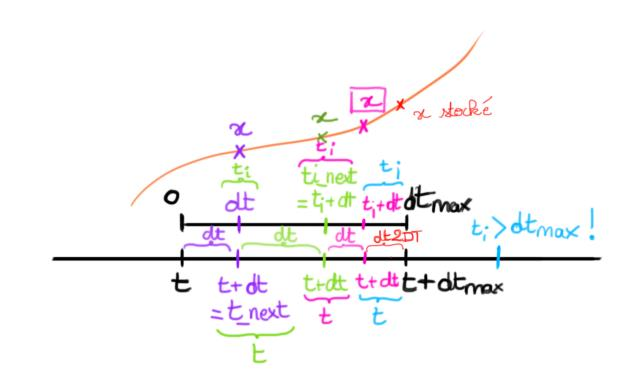

## Test de l'algorithme

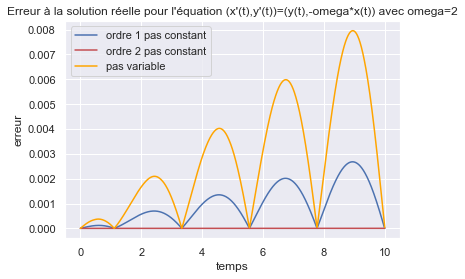

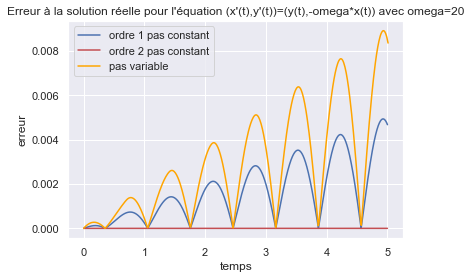

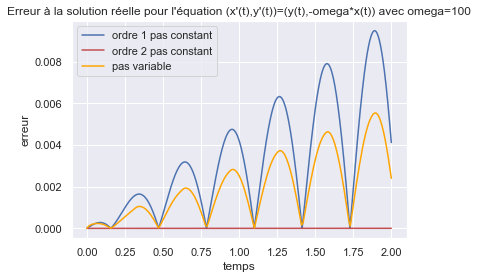

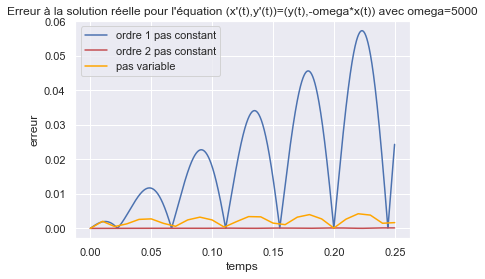

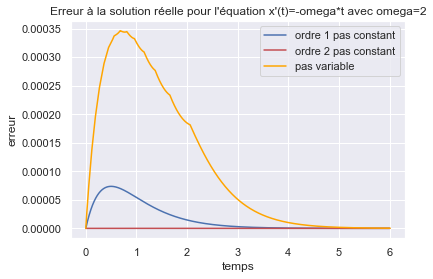

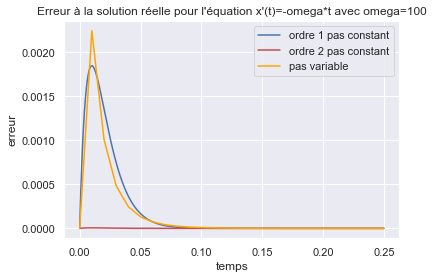

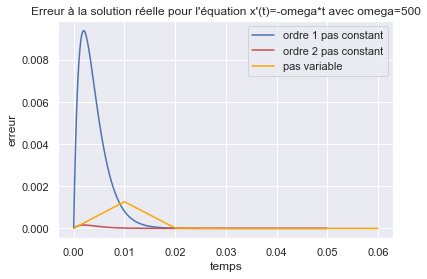

C:\Users\coren\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


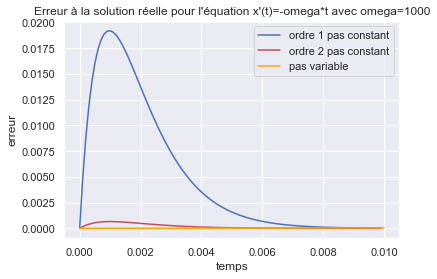

In [63]:
#Les deux méthodes à pas constant

def solve_euler_explicit2(omega,f,x0,dt,t0,tf):
    t=np.arange(t0,tf,dt)
    x=[x0]
    for i in range(len(t)-1):
        x+=[x[i]+dt*f(x[i],omega)]
    x=np.array(x)
    return t,x.T

def solve_heun_explicit2(omega,f,x0,dt,t0,tf):
    t=np.arange(t0,tf,dt)
    x=[x0]
    for i in range(len(t)-1):
        x+=[x[i]+dt*(f(x[i],omega)+f(x[i]+dt*f(x[i],omega),omega))/2]
    x=np.array(x)
    return t,x.T

#Les deux fonctions définissant les équations différentielles

def f2(xy, omega):
    x, y = xy
    return np.array([y, -omega*x])
def g2(x, omega):
    return -omega*x

#Les solutions exactes correspondantes 

def fc(x, omega):
    return -np.cos(x*(omega**.5))

def gc(x, omega):
    return np.exp(-x*omega)

#tpscalc détermine Pas2 et Pas2, les pas pour lesquelles les deux méthodes à pas constant ont
#le même temps de calcul que la méthode à pas variable, en fonction de h la fonction telle que x'=h(x)

def tpscalc(T,omega,h,hc,x0):
    PAS=np.arange(0,0.2,0.0001)
    PAS=PAS[1:]
    ERR1,ERR2,TPS1,TPS2=[],[],[],[]
    tps31=time.perf_counter()
    t3,x3=solve_ivp_euler_explicit_variable_step(omega,h, 0.0, x0, T)
    tps32=time.perf_counter()
    dT=tps32-tps31
    for i in PAS :
        tps1=time.perf_counter()
        t1,x1=solve_euler_explicit2(omega,h,x0,i,0,T)
        tps2=time.perf_counter()
        x1c=hc(omega,t1)
        if abs(tps1-tps2)<dT:
            Pas1=i
            break
    for i in PAS :
        tps1=time.perf_counter()
        t2,x2=solve_heun_explicit2(omega,h,x0,i,0,T)
        tps2=time.perf_counter()
        x1c=hc(t2,omega)
        if abs(tps1-tps2)<dT:
            Pas2=i
            break
    return Pas1,Pas2,t3,x3

#tracer trace l'erreur à la solution réelle pour les 3 méthodes étudiées (ordre 1 pas constant, ordre 2 pas constant,
#ordre 1 pas variable) à chaque instant.

def tracer(T,omega,h,hc,x0):
    Pas1,Pas2,t3,x3=tpscalc(T,omega,h,hc,x0)
    t1,x1=solve_euler_explicit2(omega,h,x0,Pas1,0,T)
    t2,x2=solve_heun_explicit2(omega,h,x0,Pas2,0,T)
    x1c,x2c,x3c=hc(t1,omega),hc(t2,omega),hc(t3,omega)
    if len(x1)!=2:
        x1=[x1,0]
        x2=[x2,0]
        titre="x'(t)=-omega*t"
    else:
        titre="(x'(t),y'(t))=(y(t),-omega*x(t))"
    err1=[abs(x1[0][i]-x1c[i]) for i in range(len(x1[0]))]
    err2=[abs(x2[0][i]-x2c[i]) for i in range(len(x2[0]))]
    err3=[abs(x3[0][i]-x3c[i]) for i in range(len(x3[0]))]
    plt.figure()
    plt.plot(t1,err1,'b',label='ordre 1 pas constant')
    plt.plot(t2,err2,'r',label='ordre 2 pas constant')
    plt.plot(t3,err3,'orange',label='pas variable')
    plt.xlabel('temps')
    plt.ylabel('erreur')
    plt.legend()
    plt.title("Erreur à la solution réelle pour l'équation "+ titre + " avec omega="+ str(omega))
    plt.show()

x0 = np.array([-1.0, 0.0])
OMEGA=[2,20,100,5000]
TPS=[10,5,2,0.25]
for i in range(len(OMEGA)):
    tracer(TPS[i],OMEGA[i],f2,fc,x0)
OMEGA=[2,100,500,1000]
TPS=[6,.25,.05,.01]
for i in range(len(OMEGA)):
    tracer(TPS[i],OMEGA[i],g2,gc,1)

Remarquons tout d'abord que les trois fonctions résolvant l'équation différentielle $\overset{.}{x(t)} = f(x(t))$ prennent maintenant pour argument **omega**, pulsation de la solution ou inverse du facteur d'amortissement, ce qui va nous permettre de faire varier plus facilement la fonction $f$. 

On créé une fonction **tpscalc** qui permet de déterminer les pas pour les deux ordres de calcul qui donnent le même temps de calcul que la méthode à pas variable  : quand on fait tourner **solve_euler_explicit (resp solve_heun_explicit)** avec $dt=Pas1$ (resp $dt=Pas2$), on a donc à peu près le même temps de calcul que quand on fait tourner **solve_ivp_euler_explicit_variable_step** , à fonction, condition initiale, pulsation oméga et intervalles temporelles égaux.

*Remarque :* Par la suite, nous nous réferrerons aux méthodes à pas constants d'ordre 1 et 2 directement par méthode d'ordre 1 et méthode d'ordre 2. 

La fonction tracer, quant à elle, créé les listes solutions **x1**, **x2** et **x3** avec les trois méthodes (ordre 1, ordre 2 et pas variable), ainsi qu’une liste **x1c**,**x2c**,**x3c** qui correspond à la solution réelle échantillonnée grâce aux listes **t1**, **t2** et **t3**.  On détermine bien sur ces listes grâce aux pas calculés par la fonction précédente. On détermine l’erreur pour chacune d’entre elles, qui correspond ici à l’écart à la fonction solution réelle à un instant $t$, en fonction du temps.

Ceci permet de tracer l’erreur en fonction du temps, en fonction de la méthode, à même temps de calcul, et pour différentes valeurs de oméga. 

On remarque que, dans le cas d’une fonction solution monotone comme l’exponentielle, ou plus complexe comme le cosinus, l’erreur n’est pas systématiquement plus faible avec la méthode du pas variable : c’est seulement en faisant augmenter oméga que l’on parvient à créer des fonctions solutions aux variations assez brusques pour donner l’avantage à la méthode au pas variable. Celle-ci prendre rapidement le dessus sur la méthode d’ordre 1. En revanche, pour la méthode d’ordre 2, il faut une bien plus grande augmentation d’oméga, que nous n’avons pas atteinte pour le cas de l’oscillateur harmonique. Cela laisse donc présager d'excellentes performances pour une méthode d'ordre 2 à pas variable, ce qui demanderait un nouveau calcul de $\Delta t_{new}$.

